In [81]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform);
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True);


In [85]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)  # images are 28x28
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # 10 output classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation on the output layer
        return x

# Initialize the network
net = MLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [123]:
for epoch in range(20): 

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad()

        #forward and backward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # stats
        running_loss += loss.item()
        if i % 100 == 0:    # print every 100 mini-batches
            print(f'epoch {epoch+1:2d} i={i:8d} loss:{running_loss / 100:.3f} ')
            running_loss = 0.0

print('Finished Training')

epoch  0 i=  0 loss:0.001 
epoch  0 i=100 loss:0.140 
epoch  0 i=200 loss:0.156 
epoch  0 i=300 loss:0.137 
epoch  0 i=400 loss:0.161 
epoch  0 i=500 loss:0.145 
epoch  0 i=600 loss:0.151 
epoch  0 i=700 loss:0.155 
epoch  0 i=800 loss:0.149 
epoch  0 i=900 loss:0.154 
epoch  1 i=  0 loss:0.001 
epoch  1 i=100 loss:0.139 
epoch  1 i=200 loss:0.142 
epoch  1 i=300 loss:0.132 
epoch  1 i=400 loss:0.142 
epoch  1 i=500 loss:0.143 
epoch  1 i=600 loss:0.128 
epoch  1 i=700 loss:0.142 
epoch  1 i=800 loss:0.133 
epoch  1 i=900 loss:0.138 
epoch  2 i=  0 loss:0.001 
epoch  2 i=100 loss:0.115 
epoch  2 i=200 loss:0.130 
epoch  2 i=300 loss:0.130 
epoch  2 i=400 loss:0.137 
epoch  2 i=500 loss:0.125 
epoch  2 i=600 loss:0.121 
epoch  2 i=700 loss:0.129 
epoch  2 i=800 loss:0.132 
epoch  2 i=900 loss:0.139 
epoch  3 i=  0 loss:0.004 
epoch  3 i=100 loss:0.121 
epoch  3 i=200 loss:0.118 
epoch  3 i=300 loss:0.116 
epoch  3 i=400 loss:0.131 
epoch  3 i=500 loss:0.113 
epoch  3 i=600 loss:0.114 
e

In [130]:
testData = datasets.MNIST('../data',download=True, transform=transform, train=False)

In [163]:
#STATS for the model

testloader = torch.utils.data.DataLoader(testData, batch_size=1, shuffle=True);
predictionRate = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
}
globalLoss = 0.0
for (x,y) in (testloader):
    prediction = net.forward(x)

    loss = criterion(prediction,y)
    globalLoss +=loss

    correctPrediction = torch.argmax((prediction)) == y
    predictionRate[int(y[0])].append(1 if correctPrediction else 0)

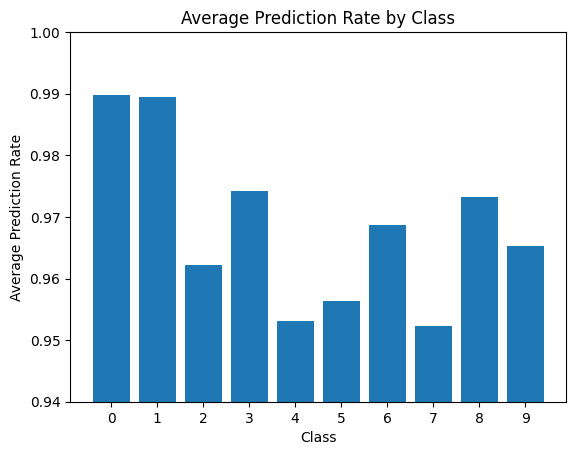

Average loss: 0.097
Acuracy: 96.880


In [193]:
import matplotlib.pyplot as plt

#accuracy
s = 0
for i,l in list(predictionRate.items()):
    s+=sum(l)
s = 100*s/len(testData)

# Calculate average prediction rate for each class
average_prediction_rate = {k: sum(v)/len(v) for k, v in predictionRate.items()}


# Create bar plot
plt.bar(average_prediction_rate.keys(), average_prediction_rate.values())
plt.ylim([0.94,1])
plt.xlabel('Class')
plt.ylabel('Average Prediction Rate')
plt.title('Average Prediction Rate by Class')
plt.xticks(list(average_prediction_rate.keys()))
plt.show()

print(f'Average loss: {globalLoss / 10000:.3f}')
print(f'Acuracy: {s:.3f}')